In [1]:
import surprise
import spline as sp
import numpy as np
import matplotlib.pyplot as plt

## Quadratic Splines in DeriveAlive

#### This notebook will demonstrate one possible application of the DeriveAlive package in plotting quadratic splines, which utilizes the derivatives carried within this program.

* Background

    * What is a quadratic spline?
    
    We aim to construct a piecewise quadratic spline $s(x)$ using $N$ equally-sized intervals over an interval for $f(x)$. Define $h=1/N$, and let $s_{k}(x)$ be the spline over the range $[kh,(k+1)h]$ for $k=0,1,\ldots,N-1$. Each $s_k(x)=a_kx^2+b_kx+c_k$ is a quadratic, and hence the spline has $3N$ degrees of freedom in total.
    
    * How to set up the math?
    
    The spline coefficients satisfy the following constraints:
    
        * Each $s_k(x)$ should match the function values at both of its endpoints, so that $s_k(kh)=f(kh)$ and $s_k( (k+1)h) =f( (k+1)h)$. (Provides $2N$ constraints.)
        
        * At each interior boundary, the spline should be differentiable, so that $s_{k-1}(kh)= s_k(kh)$ for $k=1,\ldots,N-1$. (Provides $N-1$ constraints.)
        
        * Since $f'(x+1)=10f'(x)$, let $s'_{N-1}(1) = 10s'_0(0)$. (Provides $1$ constraint.)
    
    Since there are $3N$ constraints for $3N$ degrees of freedom, there is a unique solution.

* Suite walkthrough

    * methods:
    
        * quad_spline_coeff: calculate the coefficients of quadratic splines
        
            * input: 
            
                - f: function of interest            
                - xMin: left endpoint of the $x$ interval
                - xMax: right endpoint of the $x$ interval
                - nIntervals: number of intervals that you want to slice the original function
            
            * output:
            
                - y: the right hand side of $Ax=y$
                - A: the sqaure matrix in the left hand side of $Ax=y$
                - coeffs: coefficients of $a_i, b_i, c_i$
                - ks: points of interest in the $x$ interval as DeriveAlive objects
                    
        * spline_points: get the corrdinates of points on the corresponding splines
        
            * input: f, coeffs, ks, nSplineIntervals
            
                - f: function of interest            
                - coeffs: coefficients of $a_i, b_i, c_i$
                - ks: points of interest in the $x$ interval as DeriveAlive objects
                - nSplinePoints: number of points to draw each spline
            
            * output: spline_points 
            
                - spline_points: a list of spline points $(x,y)$ on each $s_i$
        
        * quad_spline_plot: plot the original function and the corresponding splines
        
            * input: f, coeffs, ks, nSplineIntervals
            
                - f: function of interest            
                - coeffs: coefficients of $a_i, b_i, c_i$
                - ks: points of interest in the $x$ interval as DeriveAlive objects
                - nSplinePoints: number of points to draw each spline
            
            * output: fig 
            
                - fig: the plot of $f(x)$ and splines
        
        * spline_error: calculate the average absolute error of the spline and the original function at one point
        
            * input:
            
                - f: function of interest            
                - spline_points: a list of spline points $(x,y)$ on each $s_i$
            
            * output:
            
                - error: average absolute error of the spline and the original function on one given interval
        
    * external dependencies:
    
        * DeriveAive
        
        * numpy
        
        * matplotlib.pyplot

Plot the quadratic spline of $f_1(x) = 10^x, x \in [-1, 1]$ with 10 intervals.

In [2]:
def f1(var):
    return 10**var

xMin1 = -1
xMax1 = 1
nIntervals1 = 10
nSplinePoints1 = 5

y1, A1, coeffs1, ks1 = sp.quad_spline_coeff(f1, xMin1, xMax1, nIntervals1)
fig1 = sp.quad_spline_plot(f1, coeffs1, ks1, nSplinePoints1)
spline_points1 = sp.spline_points(f1, coeffs1, ks1, nSplinePoints1)
sp.spline_error(f1, spline_points1)

0.0038642295476342416

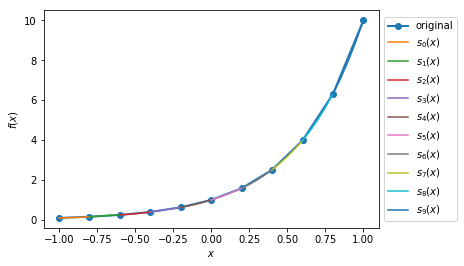

In [3]:
fig1

Plot the quadratic spline of $f_2(x) = x^3, x \in [-1, 1]$ with 10 intervals.

In [4]:
def f2(var):
    return var**3

xMin2 = -1
xMax2 = 1
nIntervals2 = 10
nSplinePoints2 = 5

y2, A2, coeffs2, ks2 = sp.quad_spline_coeff(f2, xMin2, xMax2, nIntervals2)
fig2 = sp.quad_spline_plot(f2, coeffs2, ks2, nSplinePoints2)
spline_points2 = sp.spline_points(f2, coeffs2, ks2, nSplinePoints2)
sp.spline_error(f2, spline_points2)

0.0074670329670330216

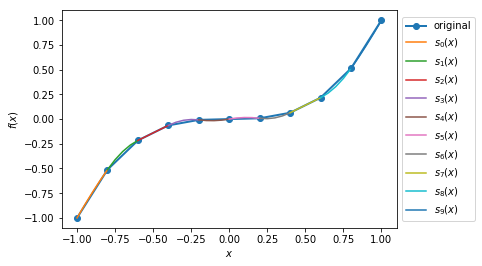

In [5]:
fig2

Plot the quadratic spline of $f_3(x) = \sin(x), x \in [-1,1]$ and $x \in [-\pi, \pi]$ with 5 intervals and 10 intervals.

In [6]:
def f3(var):
    return var.sin()

xMin3 = -1
xMax3 = 1
nIntervals3 = 5
nSplinePoints3 = 5

y3, A3, coeffs3, ks3 = sp.quad_spline_coeff(f3, xMin3, xMax3, nIntervals3)
fig3 = sp.quad_spline_plot(f3, coeffs3, ks3, nSplinePoints3)
spline_points3 = sp.spline_points(f3, coeffs3, ks3, nSplinePoints3)
sp.spline_error(f3, spline_points3)

0.015578205778177232

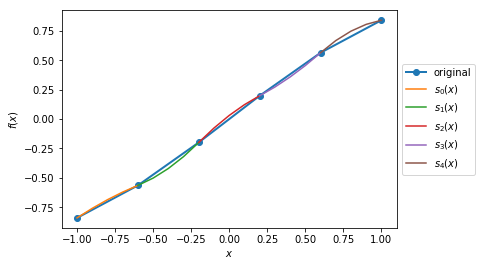

In [7]:
fig3

We can see that the quadratic splines do not work that well with linear-ish functions.

In [8]:
xMin4 = -1
xMax4 = 1
nIntervals4 = 10
nSplinePoints4 = 5

y4, A4, coeffs4, ks4 = sp.quad_spline_coeff(f3, xMin4, xMax4, nIntervals4)
fig4 = sp.quad_spline_plot(f3, coeffs4, ks4, nSplinePoints4)
spline_points4 = sp.spline_points(f3, coeffs4, ks4, nSplinePoints4)
sp.spline_error(f3, spline_points4)

0.0034954287455489196

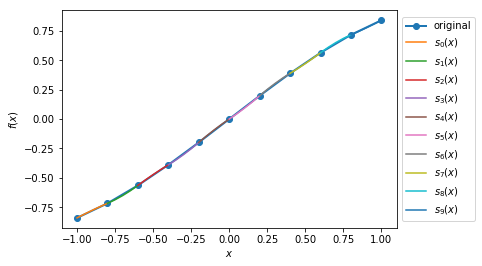

In [9]:
fig4

While adding more intervals may help to make the approximated splines better.

In [10]:
xMin5 = -sp.np.pi
xMax5 = sp.np.pi
nIntervals5 = 5
nSplinePoints5 = 5

y5, A5, coeffs5, ks5 = sp.quad_spline_coeff(f3, xMin5, xMax5, nIntervals5)
fig5 = sp.quad_spline_plot(f3, coeffs5, ks5, nSplinePoints5)
spline_points5 = sp.spline_points(f3, coeffs5, ks5, nSplinePoints5)
sp.spline_error(f3, spline_points5)

0.038537376543852475

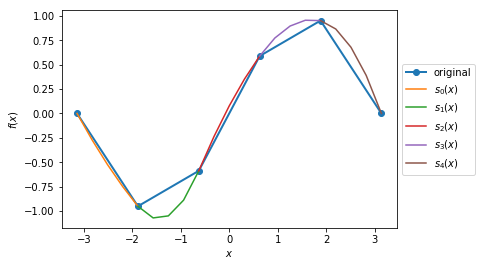

In [11]:
fig5

However, too less intervals may not be a good fit for quadratic spline either.

In [12]:
xMin6 = -sp.np.pi
xMax6 = sp.np.pi
nIntervals6 = 10
nSplinePoints6 = 5

y6, A6, coeffs6, ks6 = sp.quad_spline_coeff(f3, xMin6, xMax6, nIntervals6)
fig6 = sp.quad_spline_plot(f3, coeffs6, ks6, nSplinePoints6)
spline_points6 = sp.spline_points(f3, coeffs6, ks6, nSplinePoints6)
sp.spline_error(f3, spline_points6)

0.0005581151702077562

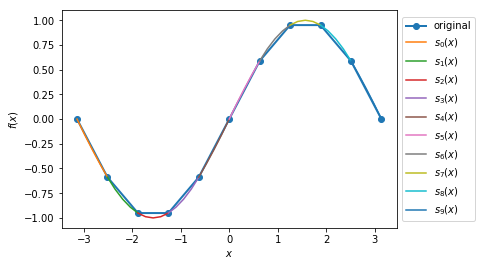

In [13]:
fig6

And adding more intervals does make the quadratic splines fit better.

We will demonstrate this with $f(x) = \sin(x), x \in [-\pi, \pi]$ at intervals from 5 to 100.

In [14]:
def f(var):
    return var.sin()

xMin = -sp.np.pi
xMax = sp.np.pi
nIntervalsList = sp.np.arange(5, 100, 1)
nSplinePoints = 5
squaredErrorList = []

for nIntervals in nIntervalsList:
    y, A, coeffs, ks = sp.quad_spline_coeff(f, xMin, xMax, nIntervals)
    spline_points = sp.spline_points(f, coeffs, ks, nSplinePoints)
    error = sp.spline_error(f, spline_points)
    squaredErrorList.append(error)

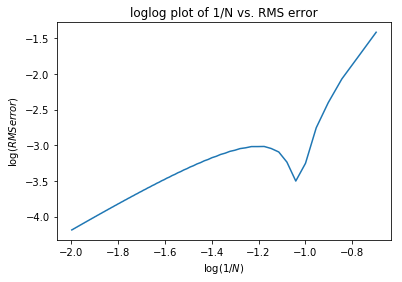

In [17]:
plt.figure()
plt.plot(np.log10(1/nIntervalsList), np.log10(squaredErrorList))
plt.xlabel(r'$\log(1/N)$')
plt.ylabel(r'$\log(average error)$')
plt.title('loglog plot of 1/N vs. average error')
plt.show()

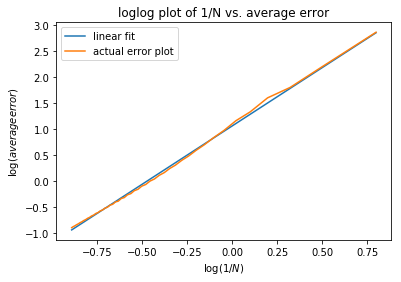

In [22]:
def f(var):
    return 10 ** var

xMin = -sp.np.pi
xMax = sp.np.pi
nIntervalsList = sp.np.arange(1, 50, 1)
nSplinePoints = 10
squaredErrorList = []

for nIntervals in nIntervalsList:
    y, A, coeffs, ks = sp.quad_spline_coeff(f, xMin, xMax, nIntervals)
    spline_points = sp.spline_points(f, coeffs, ks, nSplinePoints)
    error = sp.spline_error(f, spline_points)
    squaredErrorList.append(error)
    
plt.figure()
    
coefficients = np.polyfit(np.log10(2*np.pi/nIntervalsList), np.log10(squaredErrorList), 1)
polynomial = np.poly1d(coefficients)
ys = polynomial(np.log10(2*np.pi/nIntervalsList))
plt.plot(np.log10(2*np.pi/nIntervalsList), ys, label='linear fit')

# plt.loglog(2*np.pi/nIntervalsList, squaredErrorList)
plt.plot(np.log10(2*np.pi/nIntervalsList), np.log10(squaredErrorList), label='actual error plot')
plt.xlabel(r'$N$')
plt.ylabel('squared error')
plt.xlabel(r'$\log(1/N)$')
plt.ylabel(r'$\log(average error)$')
plt.legend()
plt.title('loglog plot of 1/N vs. average error')
plt.show()

In [23]:
beta, alpha = coefficients[0], 10**coefficients[1]

In [24]:
beta, alpha

(2.2462166565957835, 11.414027075895813)

Therefore the avereage absolute error $E_{1/N} \approx 11.4(\dfrac{1}{N})^{2.25}$ 

Now show an application of what the spline can do with thesee 20 functions.

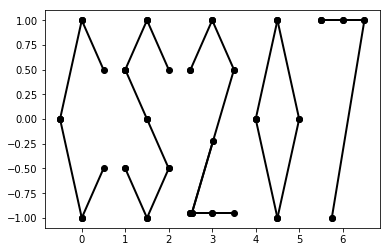

In [25]:
surprise.drawPoints()

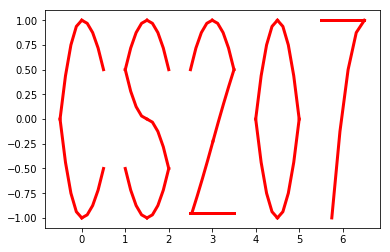

In [26]:
surprise.drawSpline()

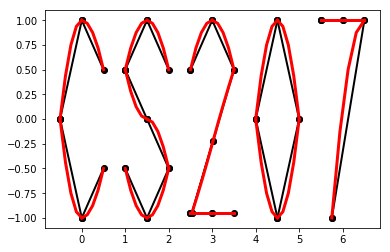

In [27]:
surprise.drawTogether()